1. Import Libraries and DataFrames
2. Create Bar Charts
3. Save Visuals
4. Histograms
5. Scatterplot and troubleshoot Histogram
6. Create 70% df
7. Create Line Charts

In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Define path
path = r'/Users/joshd/Documents/Personal/CareerFoundry/Instacart Basket Analysis'

In [3]:
#upload orders_products_merged_file
ords_prods_merge = pd.read_pickle(r'/Users/joshd/Documents/Personal/CareerFoundry/Instacart Basket Analysis/02 Data/Prepared Data/orders_products_merged.pkl')

<AxesSubplot:>

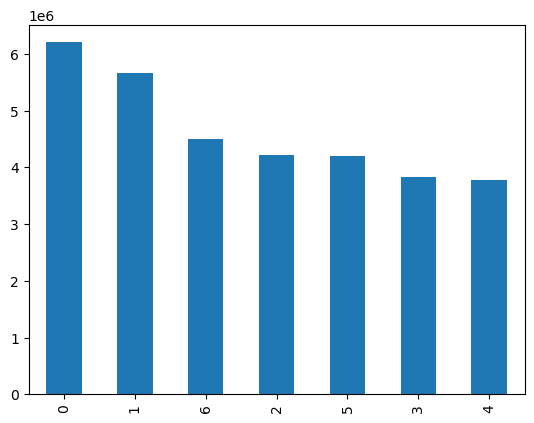

In [4]:
# bar chart
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

<AxesSubplot:>

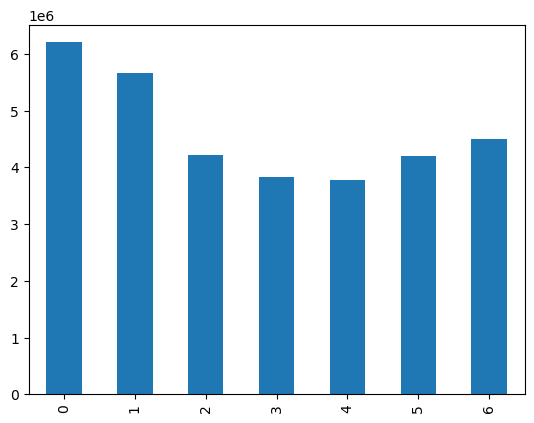

In [5]:
# bar chart
ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6')])

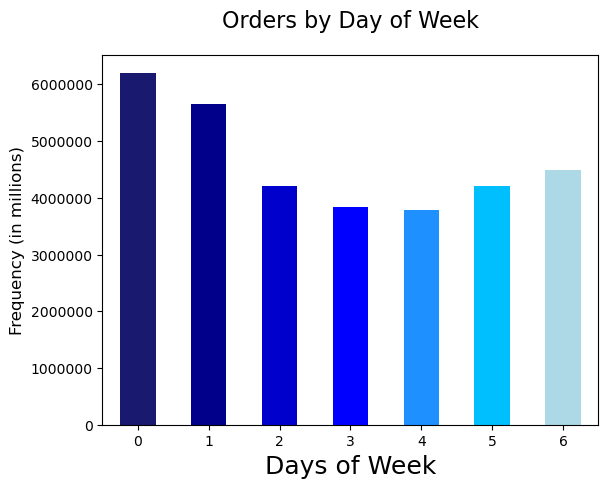

In [6]:
#save bar to Jupyter
bar_days_of_week = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(color =['midnightblue', 'darkblue', 'mediumblue', 'blue', 'dodgerblue', 'deepskyblue', 'lightblue'])
plt.title('Orders by Day of Week', fontsize = 16, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Days of Week',  fontsize = 18)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation = 0)

In [7]:
#export visuals
bar_days_of_week.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

<AxesSubplot:ylabel='Frequency'>

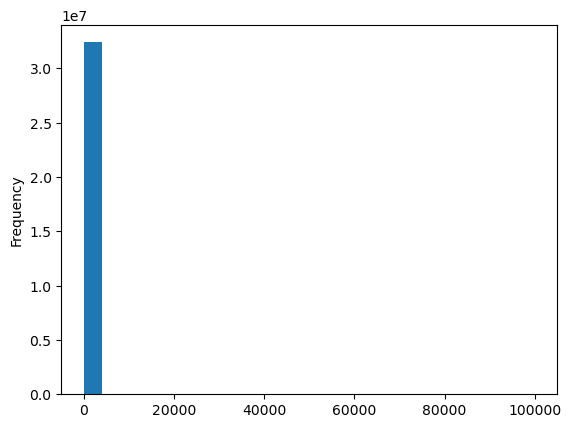

In [8]:
#prices histogram
ords_prods_merge['prices'].plot.hist(bins = 25)

In [9]:
#describe prices to fix historgram
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [10]:
ords_prods_merge['prices'].mean()

11.980225638375474

In [11]:
ords_prods_merge['prices'].median()

7.4

In [12]:
ords_prods_merge['prices'].max()

99999.0

<AxesSubplot:xlabel='prices', ylabel='prices'>

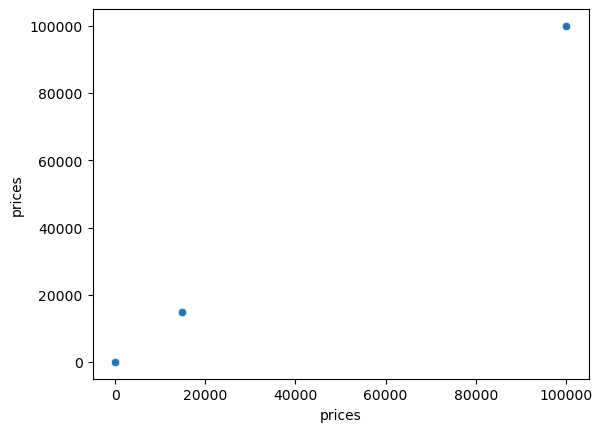

In [13]:
#create scatterplot
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [14]:
#check for outliers
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,exists,price_range_loc,busiest_day,busiest_period_of_the_day,max_order,loyalty_flag,average_price,spending_flag,median,ordering_flag
13100147,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,912404,17,12,2,14,...,both,High-range product,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
13100148,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,603376,17,22,6,16,...,both,High-range product,Regularly busy,Average orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
13100149,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,3264360,135,2,2,21,...,both,High-range product,Regularly busy,Average orders,4,New customer,1154.792308,High spender,11.5,Regular customer
13100150,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,892534,135,3,0,8,...,both,High-range product,Busiest day,Average orders,4,New customer,1154.792308,High spender,11.5,Regular customer
13100151,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,229704,342,8,1,19,...,both,High-range product,Second busiest busy,Average orders,16,Regular customer,114.426619,High spender,20.0,Regular customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21786876,33664,2 % Reduced Fat Milk,84,16,99999.0,2249946,204099,29,0,8,...,both,High-range product,Busiest day,Average orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
21786877,33664,2 % Reduced Fat Milk,84,16,99999.0,2363282,204099,31,0,9,...,both,High-range product,Busiest day,Most orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
21786878,33664,2 % Reduced Fat Milk,84,16,99999.0,3181945,204395,13,3,15,...,both,High-range product,Second to Least busy,Most orders,15,Regular customer,451.153540,High spender,4.0,Frequent customer
21786879,33664,2 % Reduced Fat Milk,84,16,99999.0,2486215,205227,7,3,20,...,both,High-range product,Second to Least busy,Average orders,12,Regular customer,1178.381871,High spender,7.0,Frequent customer


In [15]:
#get rid of outliers
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [16]:
#check outliers
ords_prods_merge['prices'].max()

25.0

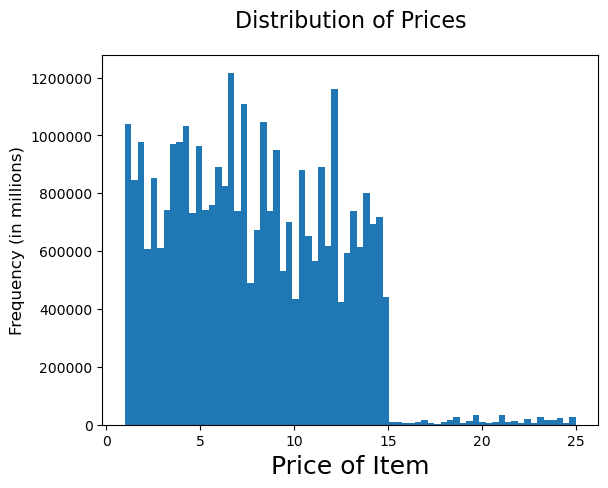

In [34]:
#prices histogram cleaned
hist = ords_prods_merge['prices'].plot.hist(bins = 70)
plt.title('Distribution of Prices', fontsize = 16, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Price of Item',  fontsize = 18)
plt.ticklabel_format(style='plain', axis='y')

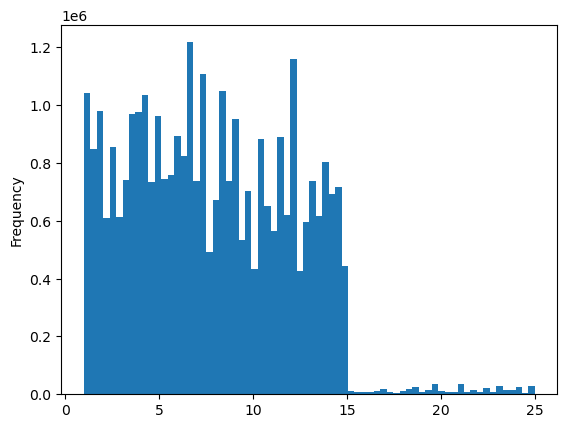

In [18]:
#prices histogram cleaned and extend bins to increase granularity
hist_2 = ords_prods_merge['prices'].plot.hist(bins = 70)

In [35]:
#export visuals histogram
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

In [20]:
#create random sample using seed
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [21]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [22]:
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [23]:
#store 70% of data in big dataframe
big = ords_prods_merge[dev]

In [24]:
# store 30% of data in small data frame
small = ords_prods_merge[~dev]

In [25]:
len(ords_prods_merge)

32404859

In [26]:
len(big) + len(small)

32404859

In [27]:
# reduce data set by limiting columns
df_2 = small[['orders_day_of_week','prices']]

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

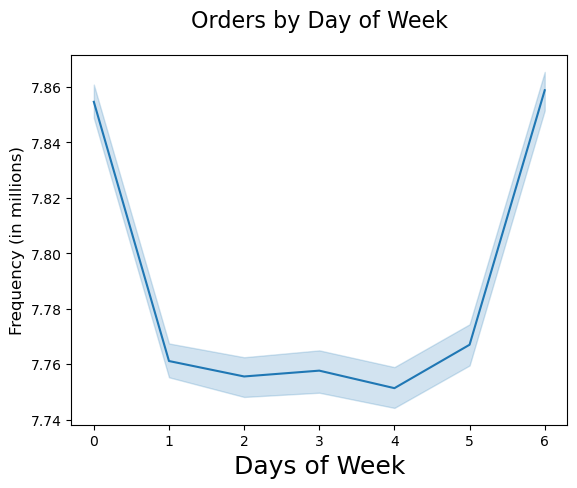

In [28]:
#line chart
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')
plt.title('Orders by Day of Week', fontsize = 16, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Days of Week',  fontsize = 18)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation = 0)

In [29]:
#checking line chart of entire data frame
df_4 = ords_prods_merge[['orders_day_of_week', 'prices']]

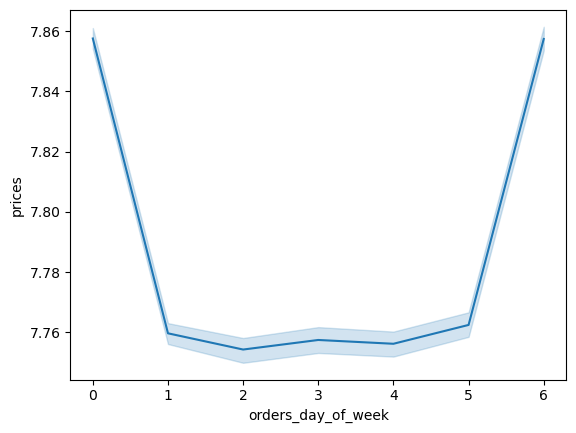

In [30]:
#checking line chart visual of entire data frame
line_2 = sns.lineplot(data = df_4, x = 'orders_day_of_week', y = 'prices')

In [32]:
#export visuals line chart
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_chart_prices_orders_day_of_week.png'))